# Learning Curve
- Check if train with more datapoints better than less datapoints?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Dataset

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

display(X[5])
display(y[5])

display(X.shape)
display(y.shape)

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

5

(1797, 64)

(1797,)

5


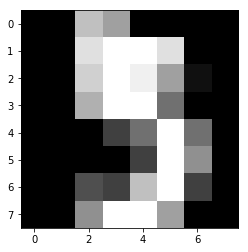

In [3]:
print(y[5])
plt.imshow(X.reshape(-1, 8, 8)[5], cmap='gray')

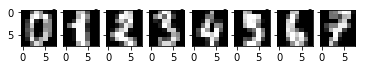

In [4]:
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X.reshape(-1, 8, 8)[i], cmap='gray')

## Onehot Encoding y

In [5]:
from keras.utils import to_categorical

y_cat = to_categorical(y, 10)

print(y_cat.shape)

Using TensorFlow backend.


(1797, 10)


## Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat,
    test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print('')
print(X_test.shape)
print(y_test.shape)

(1257, 64)
(1257, 10)

(540, 64)
(540, 10)


## Trainning size
- Train Model with [0.1, 0.4, 0.7, 1.0] trainning set

In [7]:
np.linspace(0.1, 0.999, 4)

array([0.1       , 0.39966667, 0.69933333, 0.999     ])

In [8]:
train_sizes = (len(X_train) * np.linspace(0.1, 0.999, 4)).astype(int)
train_sizes

array([ 125,  502,  879, 1255])

## Model

In [9]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()

model = Sequential()

model.add(Dense(16, input_shape=(64,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


In [10]:
# store the initial weights
initial_weights = model.get_weights()

In [11]:
train_scores = []
test_scores = []

for train_size in train_sizes:
    # Train Model with [0.1, 0.4, 0.7, 1.0] of whole trainning set
    X_train_frac, _, y_train_frac, _ = \
        train_test_split(X_train, y_train, train_size=train_size)
    
    # at each iteration reset the weights of the model
    # to the initial random weights
    model.set_weights(initial_weights)
    
    # Fit fractial Train Data
    h = model.fit(X_train_frac, y_train_frac,
                  verbose=0,
                  epochs=300,
                  callbacks=[EarlyStopping(monitor='loss', patience=1)])

    # Evaluate fractial Train Data
    r = model.evaluate(
        X_train_frac, y_train_frac,
        verbose=0)
    train_scores.append(r[-1])
    
    # Evaluate with Test Data
    e = model.evaluate(
        X_test, y_test,
        verbose=0)
    test_scores.append(e[-1])
    
    print("Done size: ", train_size)

/home/dangkhoa/.conda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Done size:  125
Done size:  502
Done size:  879
Done size:  1255


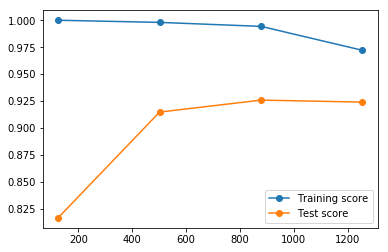

In [12]:
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.legend(loc="best")

## ==> Train with 0.7 trainning data is the best